# 3.5 커널 SVM을 사용하여 비선형 문제 풀기
## 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

In [11]:
# 데이터

# 150개의 꽃 샘플에서 꽃잎 길이와 꽃잎 너비를 특성 행렬 X에 할당하고, 이에 상응하는 꽃 품종에 해당하는 클래스 레이블을 벡터 y에 할당한다.

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
# print('클래스 레이블 :', np.unique(y)) # 클래스 레이블 : [0 1 2]

# 처음 본 데이터에서 훈련된 모델 성능을 평가하기 위해 데이터셋을 훈련 세트와 테스트 세트로 분할한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# plot_decision_regions

# plot_decision_regions 함수를 사용하여 새로운 퍼셉트론 모델의 결정 경계를 그려서 세 개의 붓꽃 샘플을 잘 구분하는지 시각화하자.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵을 설정한다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8, 
                    c = colors[idx], 
                    marker = markers[idx], 
                    label = cl, 
                    edgecolor = 'black')
        
    # 테스트 샘플을 부각하여 그린다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')
        
        
# 사이킷런의 preprocessing 모듈의 StandardScaler 클래스를 사용하여 특성을 표준화한다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined = np.hstack( (y_train, y_test) )

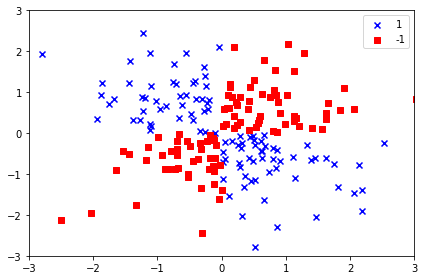

In [12]:
# 넘파이 logical_xor 함수를 사용하여 XOR 형태의 간단한 데이터셋을 만든다.
# 대략 100개의 샘플은 클래스 레이블 1로 할당되고 나머지 100개의 샘플을 클래스 레이블 -1로 할당될 것이다.

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 3.5.2 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기

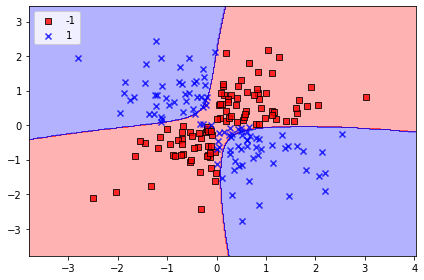

In [13]:
# 커널 SVM을 훈련하여 XOR 데이터를 구분하는 비선형 결정 경계를 그릴 수 있는지 알아보자.
# 앞서 임포트한 사이킷런의 SVC 클래스르 사용하고 매개변수 kernel='linear'를 kernel='rbf' 로 바꾼다.
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

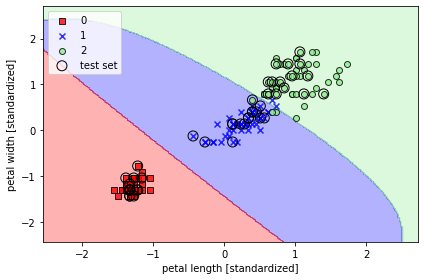

In [14]:
# gamma를 잘 이해하기 위해 붓꽃 데이터셋에서 RBF 커널 SVM을 적용해보자.
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

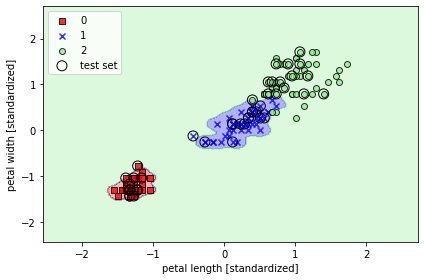

In [15]:
# gamma를 크게 해보자.
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()